# COMP41680 - Text Scraping & Classification Assignment

***

<b>Name:DARSHAN HARESH VIRA</b>

<b>Student ID: 17204812</b>

***

The assignment is about scraping the articles and categories and article classification from:
http://mlg.ucd.ie/modules/COMP41680/archive/index.html

***

## Part 1: Data Collection

<font color='red'><b><u>Goal: Collect a labelled news corpus.<b></u></font>

I divided the PART 1, into subtasks.
<p><u>Task 1:</u> Using beautiful soup I scraped the first page and collected all the links to articles arranged by the site month-wise.( January, February, .... )</p>

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
page = requests.get("http://mlg.ucd.ie/modules/COMP41680/archive/index.html") #accessing the page to be scraped. 
soup = BeautifulSoup(page.content, 'html.parser') #parsing the html source cide
#print(soup.prettify()) #dispalying html in a structured format
a=soup.find_all('a')#this returns a list of all links(a tags)
month_link=[]
all_cat=[]
print(a[0]['href']) #this shows that the link extension is scraped not the entire link
for i in a:
    URL = 'http://mlg.ucd.ie/modules/COMP41680/archive/' #main URL
    link = i['href']
    if(len(link)>2): #as it even has last two <a> tags without any href attributes which are of no use anyway.
        URL+=link #constructs the entire link for each month
        month_link.append(URL) #adds each link to a list
for i in month_link:
    print(i)

month-jan-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-jan-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-feb-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-mar-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-apr-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-may-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-jun-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-jul-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-aug-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-sep-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-oct-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-nov-2017.html
http://mlg.ucd.ie/modules/COMP41680/archive/month-dec-2017.html


<p><u>Task 2:</u> Moving to the second page, which contains a table with two columns, one is category of the article, and other one is the link to article. There are about 110-125 articles on each of the month page. So in this task I scarped the category of the article and link to article main body. From the link to the article, I moved to the next page and extracted all the content of each article and saved it in a text file. I used the article id present in each URL to name the article txt file of each article. I stored the article title and its category in a CSV file.

In [63]:
article_id=[] #list of article ids
categories=[] #stores the categories for all the
title=[] #stores title of all articles
for j in month_link: 
    links2=[] #stores the links of page 2
    page2 = requests.get(j) #getting the page for each month link
    soup2 = BeautifulSoup(page2.content,'html.parser') #parsing its HTML code
    all_tds=soup2.find_all('td') #page is in table structure, so accessing td tag
    all_tds=all_tds[2:] #discarding the column titles
    for i in range(0,len(all_tds),2): #first column is Category so every EVEN element of all_tds list is Category 
        #for each td, we need to find the category text
        var=all_tds[i].get_text().strip() # strip is used as N/A values had some spaces trailing and leading as well.
        if var!='N/A':
            categories.append(var) #so for each page, Categories list will have all the categories.
    for i in range(1,len(all_tds),2): #Second column has link to artciles,so it is every ODD element of all_tds list 
        URL2 = 'http://mlg.ucd.ie/modules/COMP41680/archive/'
        a=all_tds[i].find('a') #link to articles
        if(a!=None): #some articles are removed
            article_id.append(a['href'][8:16]) #out of href 8:16 corresponds to, 'jan-0418'(used as article id)
            URL2+=a['href'] #constructing url
            links2.append(URL2)
    for l in links2:
        page3 = requests.get(l) #getting each article
        soup3 = BeautifulSoup(page3.content,'html.parser')
        title.append(soup3.find('h2').get_text())#getting the artcile titles
        content=soup3.find_all(lambda p: p.name=='p' and not p.attrs)#as some articles have <p> tags for other 
        #links or comments which are not part of the article.
        final_content=""
        count=0
        for i in content:
            final_content+=i.get_text() #getting each text content and adding it to a string 
            file = open(str(l[52:60])+".txt",'w',encoding="utf-8") #creating a file name with article ids eg.'jan-0418.txt'
            file.write(final_content) #writing body of each article to a txt file
            file.close()
final_categories=pd.DataFrame()
final_categories['article_id']=article_id
final_categories['category']=categories
final_categories['title']=title
final_categories.to_csv("Category.csv") #saving the categories, articles id and titles to excel file

***

## Part 2: Text Classification 

<font color='red'><b><u>Goal: Pre-process the data and build two classifiers and compare the results.<b></u></font>

After the collection and storage of the article body and category, we now move forward to part 2 i.e. classifying each article belonging to Technology, Sports, Business, etc. 
The following task is divided into subtasks as follows:

##### From  the  files  created  in  Part  1, we now load the data back as raw documents

In [64]:
raw_documents=[] 
txtname=[] #to store the .txt name of the files
for i in article_id:
    txtname.append(i+".txt") #article_id+.txt makes up the file name
for i in txtname:
    fin = open(i,"r",encoding='utf-8') #opening each file
    raw_documents.append(fin.read()) #reading 
    fin.close()
print("Read %d raw text documents" % len(raw_documents))
print(raw_documents[0])#showing an example document.

Read 1408 raw text documents
The sporting industry has come a long way since the ‘60s. It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon - or later.The reason can be found in this seemingly subtle difference - other industries have customers; the sporting industry has fans. Vivek Ranadivé, leader of the ownership group of the NBA’s Sacramento Kings, explained it beautifully, “Fans will paint their face purple, fans will evangelize. ... Every other CEO in every business is dying to be in our position — they’re dying to have fans.“While fan passion alone could almost certainly keep the industry going, leagues and sporting franchises have decided not to rest on their laurels. The last few years have seen the steady introduction of technology into the world of sports - amplifying fans’ appreciation of games, enhancing athletes’ public profiles and informing their training methods, even influencing 

In [65]:
#Showing the Dataframe Created in Part 1 which has Article and Category link
final_categories['body']=raw_documents #adding the content too to the csv
print(final_categories)

     article_id    category  \
0      jan-0418  technology   
1      jan-0027    business   
2      jan-0631  technology   
3      jan-2105    business   
4      jan-3300       sport   
5      jan-4187       sport   
6      jan-1974       sport   
7      jan-3666       sport   
8      jan-2629  technology   
9      jan-2415  technology   
10     jan-4210       sport   
11     jan-4789    business   
12     jan-3452    business   
13     jan-2428  technology   
14     jan-4766  technology   
15     jan-2595  technology   
16     jan-2935    business   
17     jan-0578    business   
18     jan-3023  technology   
19     jan-2356       sport   
20     jan-1023       sport   
21     jan-0641    business   
22     jan-2461       sport   
23     jan-4541       sport   
24     jan-1259       sport   
25     jan-4007  technology   
26     jan-4171    business   
27     jan-0272  technology   
28     jan-4894       sport   
29     jan-4504    business   
...         ...         ...   
1378   d

***

##### Tokenizing Text
The first step in analysing unstructured documents is to split the raw text into individual tokens, each corresponding to a single term (word). But before tokenizing, we need to convert everything to lower case or else "Car" or "CAR" or "car" won't be the same.
##### Case Conversion
This is important as the computer treats the two words with different cases but same spelling as different. For eg, 'CAR' wont be same as 'car', so case conversion is required before analyzing.
##### Lemmatizing Text
The next step is to reduce the word to its root! For example, if we have 2 sentences:
<ol><li> I was running in the ground</li>
<li> I ran in the ground</li></ol>
    Both of the sentences mean the same but one is constructed with the tense 'running' and other with 'ran'. Both the words are used to convey the same meaning. So when we store them in a document term matrix, they will occupy different places though they mean exactly the same. This is not efficient and might even affect the analysis as the words and their values will be affected. for eg. running has a score of 3 and ran has a score of 2 but if we lemmatize them these scores will be represented by their lemmatized form. As show below:

In [66]:
import nltk
tokens=['running','ran']
lemmatizer = nltk.stem.WordNetLemmatizer()
lemma_tokens = []
for token in tokens:
    lemma_tokens.append(lemmatizer.lemmatize(token,pos='v'))#performing lemmatization
print(lemma_tokens)

['run', 'run']


 I have used lemmatization over stemming because in stemming sometimes it produces words which doesn't make any sense just to get the root of the word. So Lemmatization is better in that sense as it will always produce root words or similar words which have same meaning!

So combining, <b>Tokenizing</b>, <b>Case Conversion</b> and <b>Lemmatization</b> into one fucntion given below:

In [67]:
#function which tokenizes the data, converts it to lower-case and lemmatizes it!
from sklearn.feature_extraction.text import CountVectorizer
def lemma_tokenizer(text):
    #use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text.lower())#tokenizing the text after converting it to lower-case
    #then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append(lemmatizer.lemmatize(token)) #performing lemmatization
    return lemma_tokens #returning the lemmatized tokens

***

##### Splitting the data into Training & Testing data.
We need to split the data into training and testing data, where the training data will be used to train the model and build it well and testing to test the accuracy of the predictions made by the model. The reason for splitting the data in the first place is to avoid overfitting. As we need to make a model which is general and not specific only to the training data.

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    final_categories['body'], #body column of DataFrame has the content of each article
    final_categories['category'], #Category column of DataFrame has category for each of the article
    #random_state = 1 #makes the split produce same results everytime
    train_size=0.8, #80-20 split of the articles into training and testing data
    test_size=0.2 #It's common-sense but have to specify or it shows warning.
)
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  1126
Test dataset:  282


***

#### Term Frequency- Inverse Document Frequency(TF-IDF) over Document Term Matrix
A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. But it fails if some term appears in too many documents and sometimes might affect the analysis. So it is better to include a bit more of the information which can be done by using TF-IDF matrix.
Term Frequency(TF) of TF-IDF stands for same,term frequency but Inverse Document Frequency(IDF) will penalize terms which are too common across all the documents. 

<p><i>I did run the entire code using Document Term Matrix, the accuracy and even F-measure score with TF-IDF is a bit better!</i>

##### Stop words
Many of the words aren't of any use and appear in all texts of english, i.e. is,the for, etc which are the STOP-WORDS. As they are present in all the documents, they aren't quite useful for analyzing the data and then classifying it. We need to remove those while creating the TF-IDF matrix.


##### Remove Low frequency words
This is very straight forward, if a word appears very rarely or appears in a very less of the documents of same or different category, then what's the use of storing information(weights or counts) regarding that word as it won't affect the analysis in any case. We need to remove such low frequency words so such words aren't stored in the TF-IDF matrix.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf_vector = TfidfVectorizer(stop_words="english", min_df = 3,tokenizer=lemma_tokenizer)
#terms with frequency less than 3 and using lemma_tokenizer
training_data = TfIdf_vector.fit_transform(X_train) #making a sparse TF-IDF matrix of token counts for training data
testing_data = TfIdf_vector.transform(X_test) #making a sparse TF-IDF matrix of token counts for testing data
TfIdf_vector2=TfidfVectorizer()#no processing included!
training_data2 = TfIdf_vector2.fit_transform(X_train) #training data without any processing
testing_data2 = TfIdf_vector2.transform(X_test) #testing data without any processing
print("Before processing the number of terms we have:",len(TfIdf_vector2.vocabulary_))
print("After processing the number of terms we have:",len(TfIdf_vector.vocabulary_))
print(training_data.shape)
print(testing_data.shape)

Before processing the number of terms we have: 21294
After processing the number of terms we have: 7685
(1126, 7685)
(282, 7685)


***

#### Classifying Models:
The models I have explored in this notebook are:
1. <u>Naive Bayes</u>:<br>
Simple classifier based on counts. Requires less training data,but it assumes all features are independent which might be a problem in our case where the certain terms might be related to each other and they together might tell us more about what the article is and classifies the article better.
2. <u>KNN</u>:<br>
Simple but effective "lazy" classifier. Find most similar previous examples for which a decision has already 
been made (i.e. their nearest neighbours from the training set).

###### Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB() #creating a model based on Naive Bayes Classification
naive_bayes.fit(training_data, y_train) #training the model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
naive_predictions = naive_bayes.predict(testing_data) #giving the testing data to the model to generate predictions
naive_predictions

array(['sport', 'sport', 'sport', 'technology', 'business', 'business',
       'business', 'sport', 'sport', 'business', 'business', 'technology',
       'technology', 'technology', 'sport', 'technology', 'sport', 'sport',
       'business', 'business', 'technology', 'business', 'technology',
       'sport', 'technology', 'technology', 'sport', 'business', 'sport',
       'business', 'technology', 'business', 'sport', 'business',
       'business', 'technology', 'technology', 'technology', 'sport',
       'technology', 'sport', 'business', 'technology', 'business',
       'sport', 'sport', 'business', 'business', 'technology',
       'technology', 'technology', 'technology', 'technology', 'sport',
       'business', 'technology', 'technology', 'business', 'business',
       'technology', 'technology', 'sport', 'sport', 'sport', 'technology',
       'business', 'sport', 'business', 'technology', 'business',
       'business', 'sport', 'sport', 'business', 'business', 'business',
       

###### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)#creating a model based on KNN Classification
knn_model.fit(training_data, y_train) #training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [73]:
knn_predictions = knn_model.predict(testing_data)#feeding the testing data to the model to generate predictions
knn_predictions

array(['sport', 'sport', 'sport', 'technology', 'sport', 'business',
       'business', 'sport', 'sport', 'business', 'business', 'technology',
       'technology', 'technology', 'sport', 'technology', 'sport', 'sport',
       'business', 'business', 'technology', 'technology', 'technology',
       'sport', 'technology', 'technology', 'sport', 'business', 'sport',
       'business', 'technology', 'business', 'sport', 'business',
       'business', 'technology', 'technology', 'technology', 'sport',
       'technology', 'sport', 'business', 'technology', 'business',
       'sport', 'sport', 'business', 'business', 'technology',
       'technology', 'technology', 'technology', 'technology', 'sport',
       'business', 'technology', 'technology', 'business', 'business',
       'technology', 'technology', 'sport', 'sport', 'sport', 'technology',
       'business', 'sport', 'business', 'technology', 'business',
       'business', 'sport', 'sport', 'business', 'business', 'business',
       '

***

##### Evaluation of Classifiers

There are number of ways to evaluate the classifiers, the prediction made by them when it comes to unseen data or new data. Better trained the model is, better are the classification predictions given by the model.<br>
1. <u>Accuracy</u>: <br>
Simplest measure. <b>Fraction of correct predictions</b> made by the classifier.
2. <u>Recall Score</u>:<br>
The recall is the ratio <b>tp / (tp + fn)</b> where tp is the number of true positives and fn the number of false negatives.In short it is the is the fraction of relevant instances(tp) that have been retrieved over the total amount of relevant instances(tp+fn).
3. <u>Precision Score</u>:<br>
The precision is the ratio <b>tp / (tp + fp)</b> where tp is the number of true positives and fp the number of false positives. In short it is the fraction of relevant instances(tp) among the retrieved instances(tp+fp).
4. <u>F1 Score</u>: <br>
The F1 score can be interpreted as a <b>weighted average of the precision and recall</b>, where an F1 score reaches its best value at 1 and worst score at 0.
5. <u> K-Cross Fold Validation</u>:<br>
In k-fold cross-validation, the original sample is randomly partitioned into <b>k equal sized subsamples</b>. Of the k subsamples, a <b>single subsample</b> is retained as the <b>validation data for testing</b> the model, and the remaining <b>k − 1 subsamples</b> are used as <b>training data.

<div align="center"><b><u>Evaluation of Naive Bayes:</u></b></div>

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy score: ", accuracy_score(y_test, naive_predictions))
print("Recall score: ", recall_score(y_test,naive_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, naive_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, naive_predictions, average = 'weighted'))

Accuracy score:  0.971631205674
Recall score:  0.971631205674
Precision score:  0.971805136971
F1 score:  0.971660551679


###### K-Cross Fold Evaluation of Naive Bayes:


In [81]:
from sklearn.model_selection import cross_val_score
naive_acc_scores = cross_val_score(naive_bayes, testing_data, y_test, cv=2, scoring="accuracy")
#naive_bayes attribute specifies the model, data, target labels, cv says number of folds. Scoring is based on Accuracy
print(naive_acc_scores)
print("Naive Bayes: Mean cross-validation accuracy = %.2f" % naive_acc_scores.mean())#printing mean of all scores

[ 0.95070423  0.95714286]
Naive Bayes: Mean cross-validation accuracy = 0.95


In [82]:
from sklearn.model_selection import cross_val_score
naive_f1_scores = cross_val_score(naive_bayes, testing_data, y_test, cv=2, scoring="f1_weighted")
#naive_bayes attribute specifies the model, data, target labels, cv says number of folds. Scoring is based on Accuracy
print(naive_f1_scores)
print("Naive Bayes: Mean cross-validation f1-score = %.2f" % naive_f1_scores.mean())#printing mean of all scores

[ 0.95062384  0.95708781]
Naive Bayes: Mean cross-validation f1-score = 0.95


In [85]:
from sklearn.model_selection import cross_val_score
naive_recall_scores = cross_val_score(naive_bayes, testing_data, y_test, cv=2, scoring="recall_weighted")
#naive_bayes attribute specifies the model, data, target labels, cv says number of folds. Scoring is based on Accuracy
print(naive_recall_scores)
print("Naive Bayes: Mean cross-validation Recall-score = %.2f" % naive_recall_scores.mean())#printing mean of all scores

[ 0.95070423  0.95714286]
Naive Bayes: Mean cross-validation Recall-score = 0.95


In [86]:
from sklearn.model_selection import cross_val_score
naive_prec_scores = cross_val_score(naive_bayes, testing_data, y_test, cv=2, scoring="precision_weighted")
#naive_bayes attribute specifies the model, data, target labels, cv says number of folds. Scoring is based on Accuracy
print(naive_prec_scores)
print("Naive Bayes: Mean cross-validation Precision-score = %.2f" % naive_prec_scores.mean())#printing mean of all scores

[ 0.95145768  0.9595696 ]
Naive Bayes: Mean cross-validation Precision-score = 0.96


<div align="center"><b><u>Evaluation of KNN:</u></b></div>

In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("Accuracy score: ", accuracy_score(y_test, knn_predictions))
print("Recall score: ", recall_score(y_test, knn_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, knn_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, knn_predictions, average = 'weighted'))

Accuracy score:  0.946808510638
Recall score:  0.946808510638
Precision score:  0.946920392915
F1 score:  0.946846773457


###### K-cross Fold Evaluation of KNN:

In [89]:
from sklearn.model_selection import cross_val_score
acc_scores_knn = cross_val_score(knn_model, testing_data, y_test, cv=2, scoring="accuracy")
#knn_model specifies model used, data used, target labels used, cv says number of folds. Scoring is based on Accuracy.
print(acc_scores_knn)
print("KNN: Mean cross-validation accuracy = %.2f" % acc_scores_knn.mean()) #printing mean of all scores

[ 0.93661972  0.94285714]
KNN: Mean cross-validation accuracy = 0.94


In [90]:
from sklearn.model_selection import cross_val_score
f1_scores_knn = cross_val_score(knn_model, testing_data, y_test, cv=2, scoring="f1_weighted")
#knn_model specifies model used, data used, target labels used, cv says number of folds. Scoring is based on Accuracy.
print(f1_scores_knn)
print("KNN: Mean cross-validation F1-score = %.2f" % f1_scores_knn.mean()) #printing mean of all scores

[ 0.93666885  0.94163228]
KNN: Mean cross-validation F1-score = 0.94


In [91]:
from sklearn.model_selection import cross_val_score
prec_scores_knn = cross_val_score(knn_model, testing_data, y_test, cv=2, scoring="precision_weighted")
#knn_model specifies model used, data used, target labels used, cv says number of folds. Scoring is based on Accuracy.
print(prec_scores_knn)
print("KNN: Mean cross-validation Precision-score = %.2f" % prec_scores_knn.mean()) #printing mean of all scores

[ 0.93841471  0.9447695 ]
KNN: Mean cross-validation Precision-score = 0.94


In [92]:
from sklearn.model_selection import cross_val_score
recall_scores_knn = cross_val_score(knn_model, testing_data, y_test, cv=2, scoring="recall_weighted")
#knn_model specifies model used, data used, target labels used, cv says number of folds. Scoring is based on Accuracy.
print(recall_scores_knn)
print("KNN: Mean cross-validation Recall-score = %.2f" % recall_scores_knn.mean()) #printing mean of all scores

[ 0.93661972  0.94285714]
KNN: Mean cross-validation Recall-score = 0.94


***

##### Conclusion and  Reasons

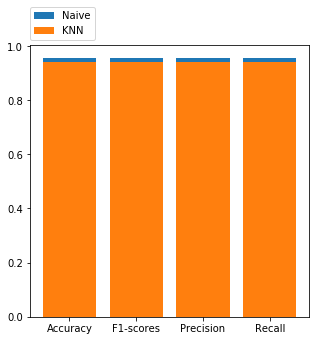

In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
#creating dictionaries of the scores for naive and knn
naive_scores={'Accuracy':naive_acc_scores.mean(),'F1-scores':naive_f1_scores.mean(),'Precision':naive_prec_scores.mean(),'Recall':naive_recall_scores.mean()}
knn_scores = {'Accuracy':acc_scores_knn.mean(),'F1-scores':f1_scores_knn.mean(),'Precision':prec_scores_knn.mean(),'Recall':recall_scores_knn.mean()}
#plotting naive
plt.bar(range(len(naive_scores)), list(naive_scores.values()), align='center',label='Naive')
plt.xticks(range(len(naive_scores)), list(naive_scores.keys()))
#plotting knn
plt.bar(range(len(knn_scores)), list(knn_scores.values()), align='center',label='KNN')
plt.xticks(range(len(knn_scores)), list(knn_scores.keys()))
#formatting the legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, borderaxespad=0.)
#graph display!
plt.show()

1. Accuracy was given first priority as we knew already, the class labels and the article to be classified(supervised learning).
2. The accuracy,f1-score,precision,recall of Naive Bayes is all time higher compared to KNN. Naive Bayes even had an accuracy of 1.0 in one of the cross fold evaluations.
3. For the given data, Naive Bayes is a better classifier compared to KNN.
4. TF-IDF is better compared to Document term matrix as all of the above scores were low compared to the ones achieved through TF-IDF.